## Oasis Infobyte

### Email Spam detection with Machine Learning

### Shamitha Jain

In [2]:
import string
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, ConfusionMatrixDisplay

import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     /home/1b636706-84f0-4a2f-9a33-
[nltk_data]     2f717fd664c6/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/1b636706-84f0-4a2f-9a33-
[nltk_data]     2f717fd664c6/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

### Loading the Dataset

In [4]:
df=pd.read_csv("spam.csv", encoding="ISO-8859-1")

df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


## Shape of the data

In [6]:
rows, cols= df.shape 
print(f"""
No. of rows: {rows}, No. of columns: {cols} """)


No. of rows: 5572, No. of columns: 5 


### A brief about Dataset

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


### Percentage of null values in dataset

In [8]:
(df.isnull().sum() / df.shape[0])*100

v1             0.000000
v2             0.000000
Unnamed: 2    99.102656
Unnamed: 3    99.784637
Unnamed: 4    99.892319
dtype: float64

Need to remove following columns:
-Unnamed 2
-unnamed 3
-unnamed 4

### Duplicate rows in a dataset

In [9]:
df.duplicated(subset=["v1", "v2"]).sum()

403

## Data Cleaning

### Drop last three columns

In [13]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)


### Renaming columns

In [16]:
df.rename({"v1": "target", "v2": "text"}, axis=1, inplace=True)


### Dropping all duplicated rows

In [17]:
df.drop_duplicates(inplace=True)


### Label encode the target column

In [20]:
label_encoder = LabelEncoder()
df['target']=label_encoder.fit_transform(df['target'])


## A look on Cleaned Data

In [21]:
rows, cols= df.shape 
print(f"""
No. of rows: {rows}, No. of columns: {cols} """)


No. of rows: 5169, No. of columns: 2 


### No. of null rows

In [22]:
df.isnull().sum()

target    0
text      0
dtype: int64

### No. of duplicated rows

In [23]:
df.duplicated().sum()

0

In [24]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


### Exploratory Analysis

### Ratio of ham and spam messages in dataset

In [25]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

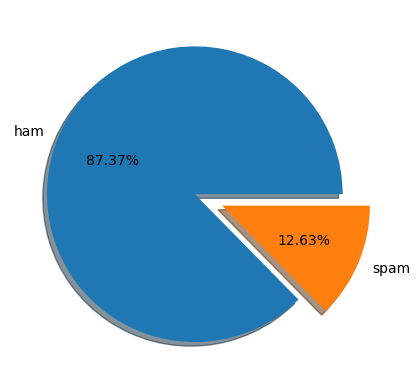

In [29]:
import matplotlib.pyplot as plt

plt.pie(
    df['target'].value_counts(),
    labels=['ham', 'spam'],
    autopct="%0.2f%%",
    shadow=True,
    explode=[0, 0.2]
)
plt.show()


### No. of characters in each row

In [30]:
df['num_characters'] = df['text'].apply(len)


### No. of words in each row

In [32]:

df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))


### No. of sentences in each row

In [33]:
df['num_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))


In [34]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


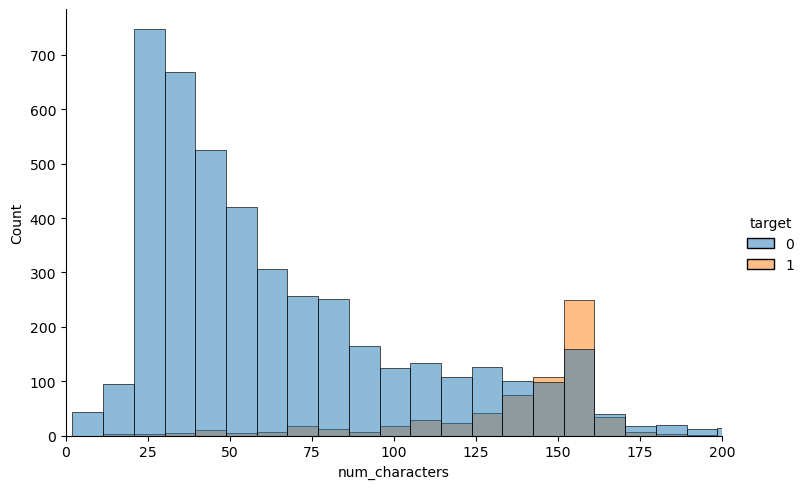

In [37]:

sns.displot(
    data=df,
    hue="target",
    x="num_characters",
    kind="hist",
    fill=True,
    height=5, aspect=1.5
)

plt.xlim(0, 200)  # set x-axis limit
plt.show()


<Axes: >

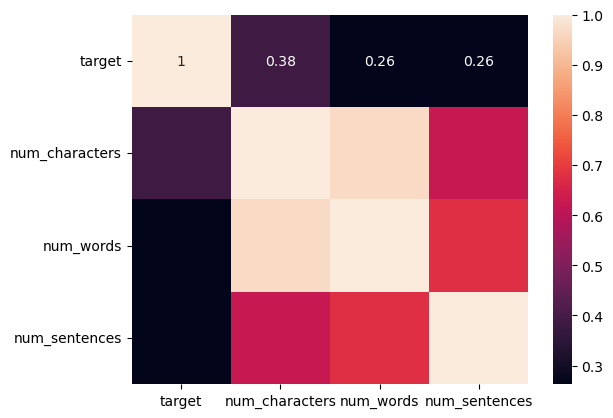

In [39]:
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True)


## Data Preprocessing

### Convert to lowercase

In [ ]:
df["text"] = df["text"].apply(lambda x: x.lower())
df["text"].head(3)

### Perform tokenization

In [41]:
df["transformed_text"] = df["text"].apply(lambda x: nltk.word_tokenize(x))


### Remove all non alphanumeric words

In [42]:
def remove_non_alphanumeric(text_list):
    clear_text_list = []
    for word in text_list:
        if word.isalnum():
            clear_text_list.append(word)
    return clear_text_list


In [43]:
df["transformed_text"] = df["transformed_text"].apply(lambda x: remove_non_alphanumeric(x))

### Remove stopwords and punctuation marks

In [48]:

def remove_stopword_punctuations(text_list):
    clear_text_list = []
    for word in text_list:
        if word not in stopwords.words('english') and word not in string.punctuation:
            clear_text_list.append(word)
    return clear_text_list

df["transformed_text"] = df["transformed_text"].apply(remove_stopword_punctuations)


### Remove similar words

In [47]:

def remove_similar_words(text_list):
    ps = PorterStemmer()
    clear_text_list = []
    for word in text_list:
        clear_text_list.append(ps.stem(word))
    return ' '.join(clear_text_list)


In [49]:
df["transformed_text"] = df["transformed_text"].apply(remove_similar_words)

In [50]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah i think goe usf live around though


### Thirty most frequent words in spam messages

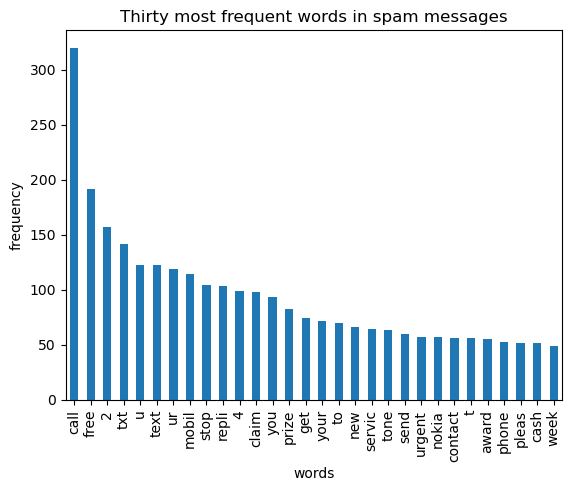

In [51]:

temp_list = []
spam_text_list = df[df["target"] == 1]["transformed_text"].to_list()

# Collect all words from spam messages
for text in spam_text_list:
    temp_list.extend(text.split(" "))

# Convert to Series for counting
spam_word_series = pd.Series(temp_list)

# Plot top 30 most frequent words
spam_word_series.value_counts()[:30].plot(
    kind="bar",
    xlabel="words",
    ylabel="frequency",
    title="Thirty most frequent words in spam messages")
plt.show()

### Thirty most frequent words in spam messages

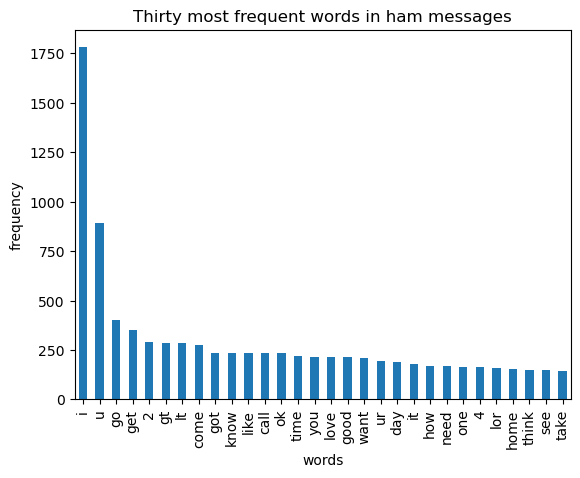

In [52]:
temp_list = []
# Get ham messages (assuming target=0 is ham)
ham_text_list = df[df["target"] == 0]["transformed_text"].to_list()

# Collect all words from ham messages
for text in ham_text_list:
    temp_list.extend(text.split(" "))

# Convert to Series for counting
ham_word_series = pd.Series(temp_list)

# Plot top 30 most frequent words
ham_word_series.value_counts()[:30].plot(
    kind="bar",
    xlabel="words",
    ylabel="frequency",
    title="Thirty most frequent words in ham messages"
)

plt.show()


### Model Building

In [53]:

# Create TF-IDF vectorizer
tfidf = TfidfVectorizer(max_features=3000)

# Convert text into TF-IDF features
X = tfidf.fit_transform(df['transformed_text']).toarray()

# Target values
y = df["target"].values

# Split into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=2
)


Accuracy score: 0.9739
Precision score: 1.0000


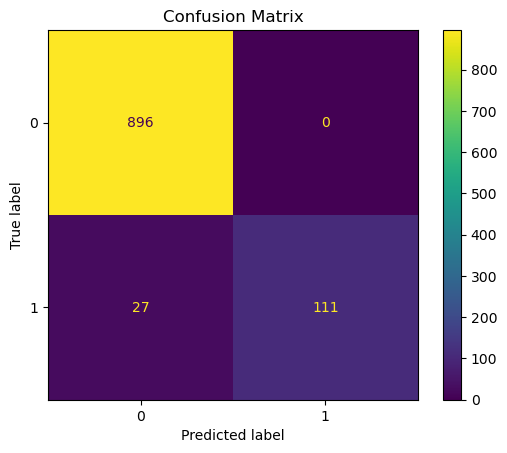

In [54]:

# Model building
mnb = MultinomialNB()
mnb.fit(x_train, y_train)

# Predictions
y_pred = mnb.predict(x_test)

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

print("Accuracy score: {:.4f}".format(accuracy))
print("Precision score: {:.4f}".format(precision))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mnb.classes_)
cm_disp.plot()
plt.title("Confusion Matrix")
plt.show()
